<a href="https://colab.research.google.com/github/Shakilkhan24/Notebooks/blob/main/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt


/kaggle/input/pima-indians-diabetes-database/diabetes.csv
/kaggle/input/diabetes-dataset-sklearn/diabetes.tab.txt


In [ ]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()
# logistic,ridgeclassifier,svm,knn,decision_tree,

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# binary classification problem... check first the ratio of outcomes [pos/neg] values

In [ ]:
df.shape

(768, 9)

In [ ]:
df.Outcome.value_counts()   # negative=500,positive=268 ...kind of little unbalanced condition ...
                            # i can do over_sampling or under_sampling
                            # or other something , anyhow to rid of this issue ...otherwise model would be biased more on -ve result_


0    500
1    268
Name: Outcome, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


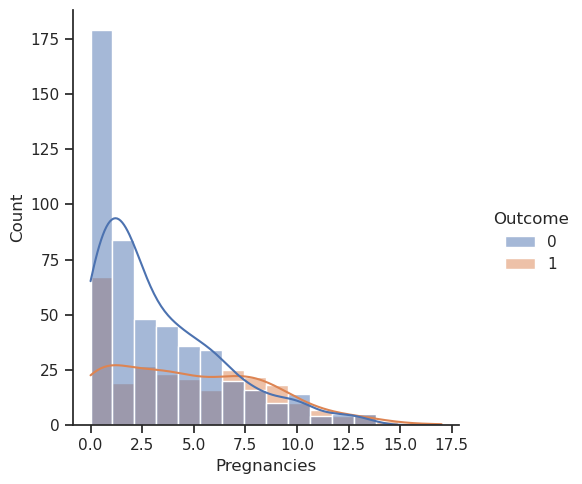

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


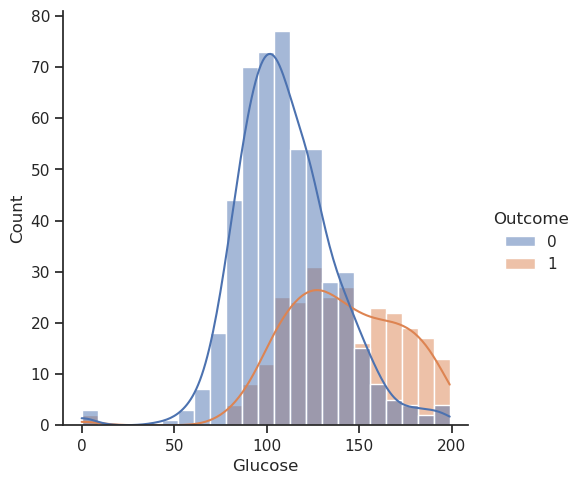

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


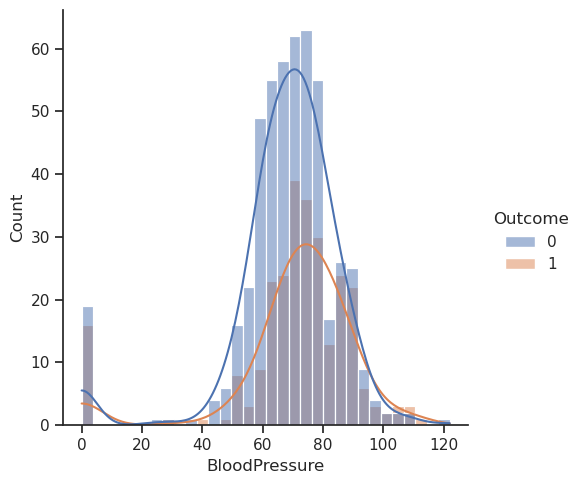

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


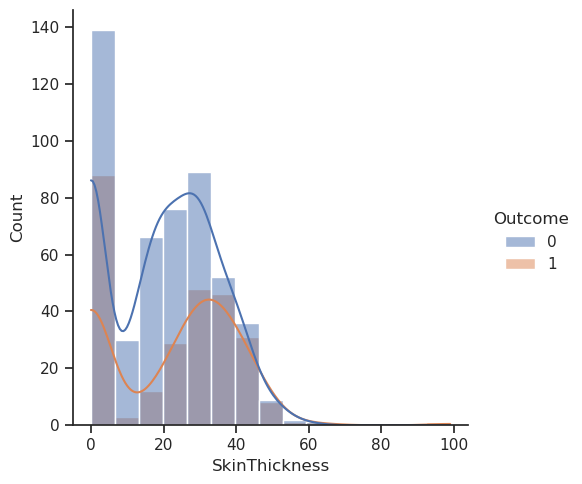

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


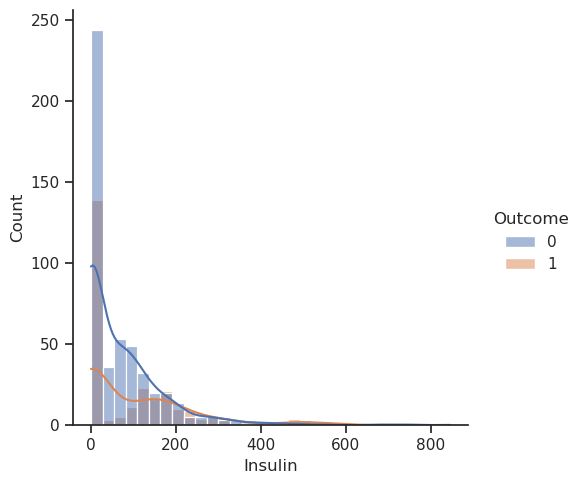

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


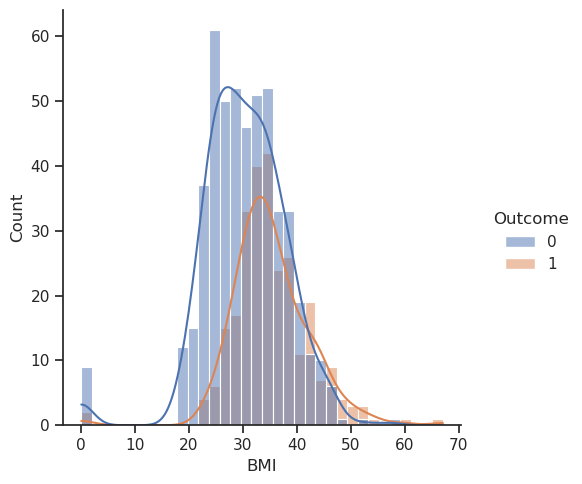

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


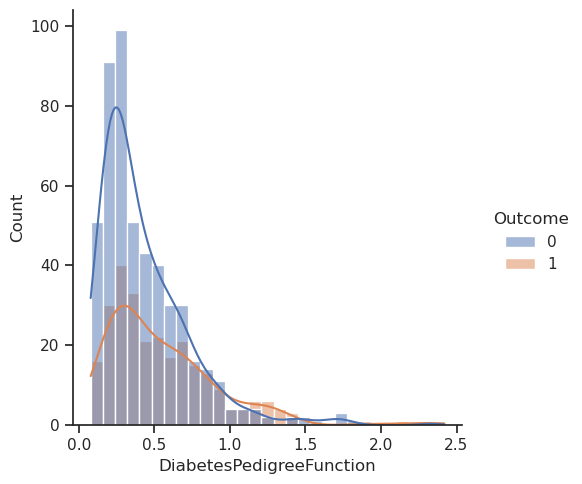

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


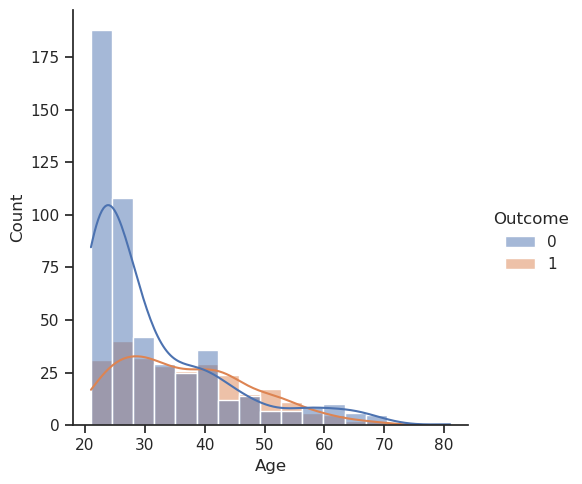

In [ ]:
for s in df.drop('Outcome',axis=1):
    sns.displot(df,x=s,hue='Outcome',kde=True,kind='hist')
    plt.show()


# VERY IMPRESSIVE RELATIONS OF FEATURES WITH THE TARGET SERIES
# WATCHING THE ESTIMETER LINE, I CAN SAY ,WHICH RANGE IS BIASED FOR POSITIVE RESULT (PROBABILITY OF DIABETES)

In [ ]:
df.dtypes    # all are numerical datas...
             # no OneHotEncoding, or OrdinalEncoding or dummy encoding

             # features are well constructed...so no need to updation

             # but if i have enough medical knowledge , then i can have created new series
             #.... using the different features" relationship

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.Pregnancies.value_counts()    # how much times a women got pregnant

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

# how the corr matrix showed correlated values with each other crossly___

In [ ]:
df[['Pregnancies','Glucose']].corr()   # that's approximately 0.13 [pregnancies vs glucose] [corelated]

,Pregnancies,Glucose
Pregnancies,1.000000,0.129459
Glucose,0.129459,1.000000


<Axes: >

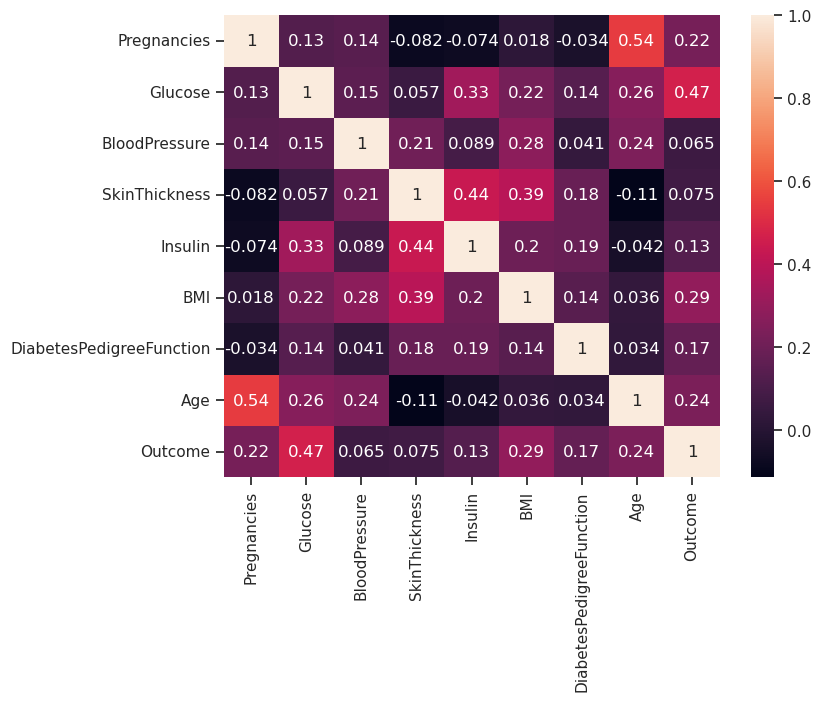

In [ ]:
cor_matrix=df.corr()
sns.heatmap(cor_matrix,annot=True)

# we see features are heavily corelated ...

# that's why RidgeClassifier is a good option ___

In [ ]:
df.isna().sum()   # there is no missing value...
                  # so no further use of imputation [simple or knn]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# look at the Outcome 1 and all their mean values

# it would give you an average range of features when might have a tendency of getting diabetes

In [ ]:
df.groupby('Outcome').agg(['mean','min','max'])     # very nice insights

Pregnancies             Glucose          BloodPressure           \
               mean min max        mean min  max          mean min  max   
Outcome                                                                   
0          3.298000   0  13  109.980000   0  197     68.184000   0  122   
1          4.865672   0  17  141.257463   0  199     70.824627   0  114   

        SkinThickness  ... Insulin        BMI             \
                 mean  ...     max       mean  min   max   
Outcome                ...                                 
0           19.664000  ...     744  30.304200  0.0  57.3   
1           22.164179  ...     846  35.142537  0.0  67.1   

        DiabetesPedigreeFunction                      Age          
                            mean    min    max       mean min max  
Outcome                                                            
0                       0.429734  0.078  2.329  31.190000  21  81  
1                       0.550500  0.088  2.420  37.067164  21  70  

[2 rows x 24 columns]

# Distribution of datas

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


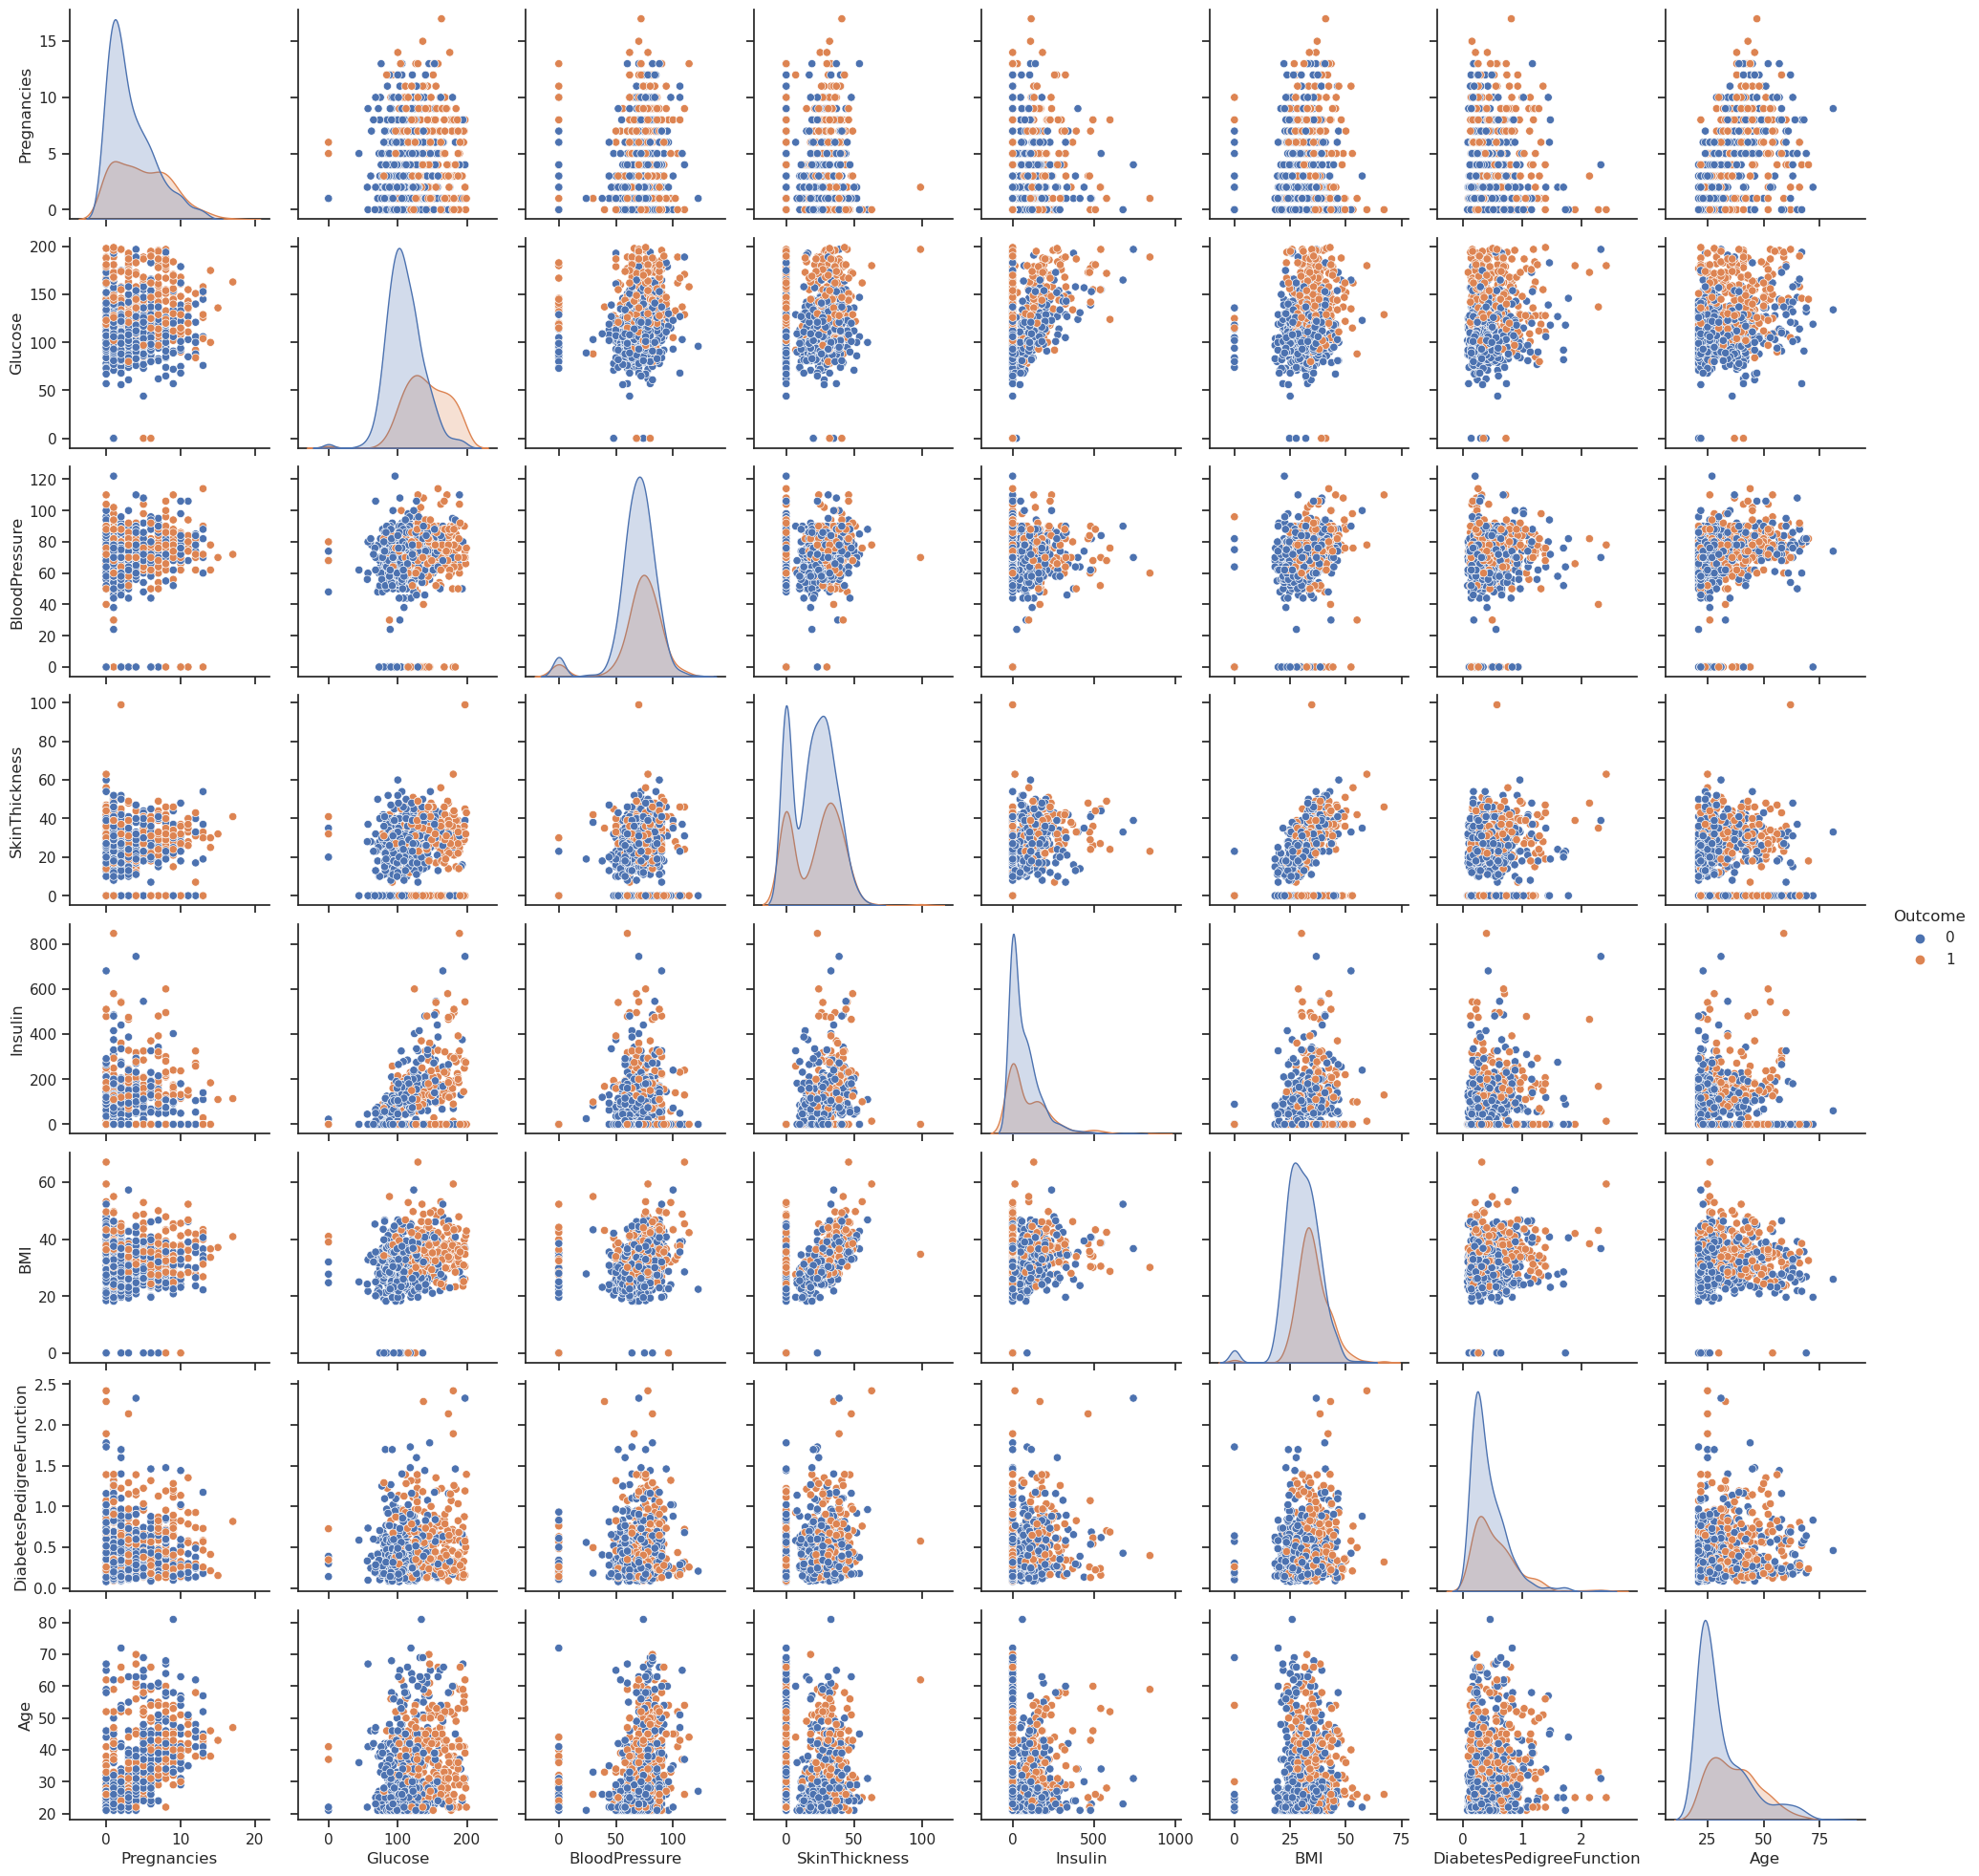

In [ ]:
sns.pairplot(df,hue='Outcome')


In [ ]:
df.groupby('Age')['Glucose'].agg(['mean','min','max']).head()

# first analysing the mean value...
# looking at the min and max values....i can say any aged people can be at the risk of diabetes...
# but the ratio can be little or big


,mean,min,max
Age,,,
21,108.317460,0,177
22,108.208333,0,199
23,111.578947,68,179
24,117.891304,77,193
25,110.083333,68,193


In [ ]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [ ]:
# Any of these can be a good example... classification problem...

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Features values are in different unit ...small or big
# suppose(mg or kg or other different units
# So need to scale the dataframe

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# For binary classification , this model might be a option ...

# but you need to be very clear on the differences of the model individual keypoints

In [ ]:
model=[LogisticRegression(),SVC(),RidgeClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]

# After preprocessing for ML models
# Checking performance , choosing for final ONE

In [ ]:
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print(type(m).__name__,'accuracy is ',accuracy_score(y_test,y_pred)*100)


# RidgeClassifier performed best ....
# because there was colinear features ...so regularized model is used...


LogisticRegression accuracy is  75.32467532467533
SVC accuracy is  73.37662337662337
RidgeClassifier accuracy is  75.97402597402598
DecisionTreeClassifier accuracy is  74.67532467532467
KNeighborsClassifier accuracy is  69.48051948051948


# LOT MORE THINGS TO DO NEXT .......

In [ ]:
# DIFFERENT MORE ACCURACY FINDING METRICS YOU CAN TRY